In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

X =  [[ 0.07852447]
 [-0.4398366 ]
 [ 0.24751337]
 [-1.25653205]
 [-0.83005436]]
y =  [[2.78281463]
 [1.86751488]
 [2.50600091]
 [1.71266326]
 [1.87215552]]


Text(0, 0.5, 'y-label')

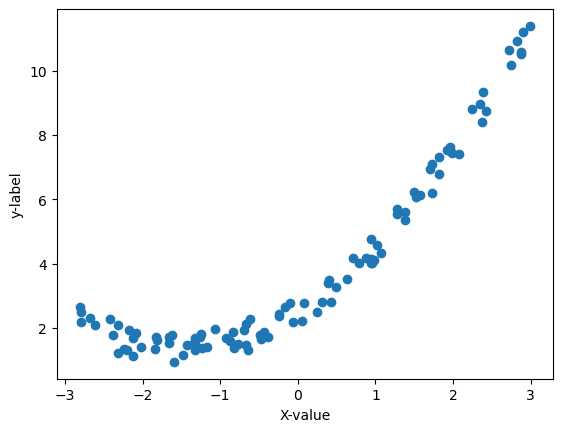

In [13]:
X = 6 * np.random.rand(100,1) - 3 # it creates 1 column with 100 rows of random variable
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)  # just to create some outliers
print("X = ",X[:5,:])
print("y = ",y[:5,:])

plt.scatter(X,y)
plt.xlabel('X-value')
plt.ylabel('y-label')

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [15]:
# now we can implement simple linear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# no need to fit the scale
reg.fit(X_train,y_train)


LinearRegression()

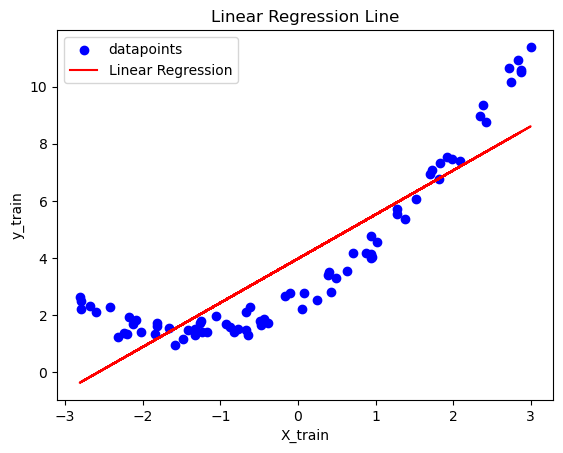

In [19]:
y_pred_train = reg.predict(X_train)

plt.scatter(X_train,y_train,color='blue',label='datapoints')

plt.plot(X_train,y_pred_train,color='red',label='Linear Regression')
# Add labels and legend
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()
plt.title("Linear Regression Line")
plt.show()

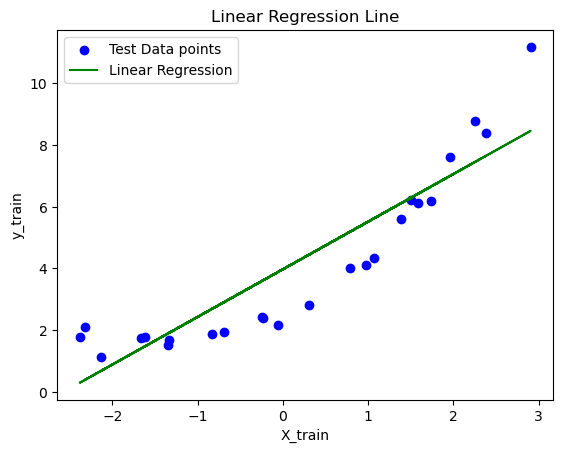

In [20]:
y_pred_test = reg.predict(X_test)

plt.scatter(X_test,y_test,color='blue',label='Test Data points')
plt.plot(X_test,y_pred_test,color='green',label='Linear Regression')

plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()
plt.title("Linear Regression Line")
plt.show()

Performance

In [21]:
from sklearn.metrics import r2_score

score_trained = r2_score(y_train,y_pred_train)
print("Trained Data r2 score: ",score_trained)

Trained Data r2 score:  0.7866885116572977


In [22]:
score_test = r2_score(y_test,y_pred_test)
print("Test Data r2 score: ",score_test)

Test Data r2 score:  0.8268346559432533


Now as we see the r2 score is very less lets optimize this, using polynomial regression

Why Include Bias?
Intercept in Regression Models:

1) Most linear models (e.g., LinearRegression) include an intercept term by default. If include_bias=True, the intercept is accounted for explicitly.
2) When Bias Is Excluded (include_bias=False):
The bias column is not added, and the regression model must handle the intercept internally or work without it.

H(x) = b1*1 + b2*x + b3*x^2, here b1 will be included in the equation all the times.

In [23]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# it shows the coefficient with [b1,b2,b3]
# the array represents [1,x,x^2] values 
X_train_poly[:5,:]

array([[ 1.        ,  1.92026288,  3.68740954],
       [ 1.        , -1.24395912,  1.5474343 ],
       [ 1.        , -1.47538549,  2.17676233],
       [ 1.        ,  0.24751337,  0.06126287],
       [ 1.        , -0.10323591,  0.01065765]])

In [27]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred = poly_reg.predict(X_test_poly)

In [34]:
print(poly_reg.coef_)
print(poly_reg.intercept_)

[[0.         1.48879649 0.50297208]]
[2.53023843]


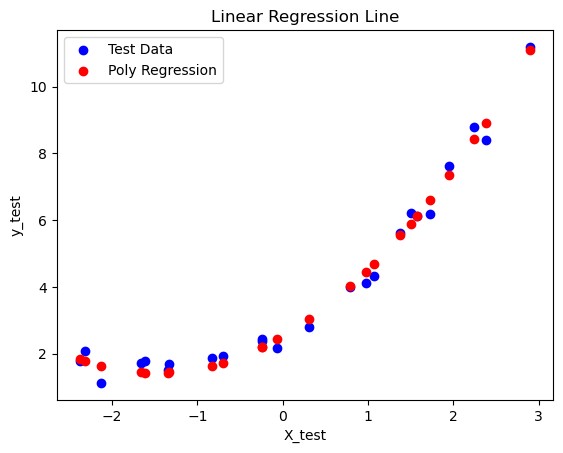

In [29]:
plt.scatter(X_test,y_test,color='blue',label='Test Data')
plt.scatter(X_test,y_pred,color='red',label='Poly Regression')

plt.xlabel("X_test")
plt.ylabel("y_test")
plt.legend()
plt.title("Linear Regression Line")
plt.show()

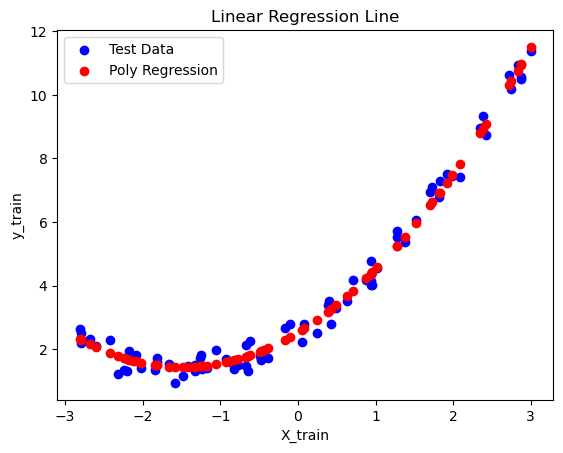

In [ ]:
y_pred_train = poly_reg.predict(X_train_poly)

plt.scatter(X_train,y_train,color='blue',label='Test Data')
plt.scatter(X_train,y_pred_train,color='red',label='Poly Regression')

plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()
plt.title("Poly Regression ")
plt.show()

In [ ]:
score_poly = r2_score(y_pred_train,y_train)
print("Poly regression on train data: ",score_poly)

Poly regression on train data:  0.9899926398775087


So we made a great increase in accuracy


# Pipeline Concepts

In [38]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):

    poly_features = PolynomialFeatures(degree=degree,include_bias = True)
    # this will help me to transform my data to [1,x,x^2] way
    
    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])

    # it does the scaling and train together
    poly_regression.fit(X_train,y_train)
    y_pred_trained_data = poly_regression.predict(X_train)

    # Sort X_train and corresponding predictions
    sorted_indices = np.argsort(X_train.flatten())  # Indices to sort X_train
    X_train_sorted = X_train[sorted_indices]        # Sorted X_train
    y_pred_sorted = y_pred_trained_data[sorted_indices]  # Predictions sorted in the same order

    # Plot the regression line with sorted data
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_train_sorted, y_pred_sorted, color='red', label='Poly Regression')


    # plt.scatter(X_train,y_train,color='blue',label='Test Data')
    # plt.plot(X_train,y_pred_trained_data,color='red',label='Poly Regression')

    plt.xlabel("X_train")
    plt.ylabel("y_train")
    plt.legend()
    plt.title("Poly Regression ")
    plt.show()


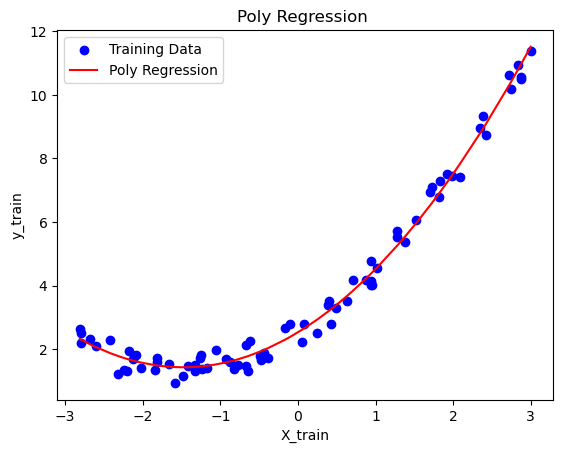

In [44]:
poly_regression(2)

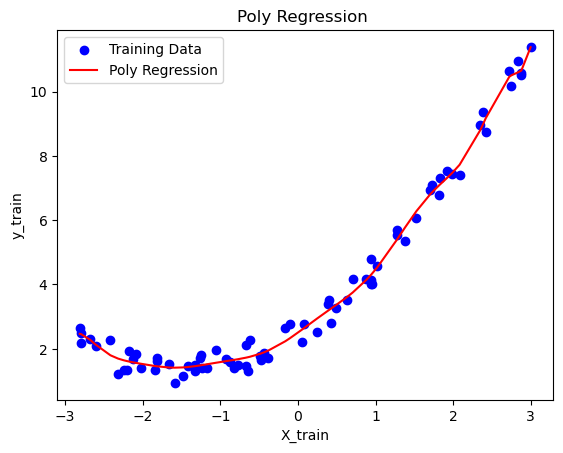

In [45]:
poly_regression(15)

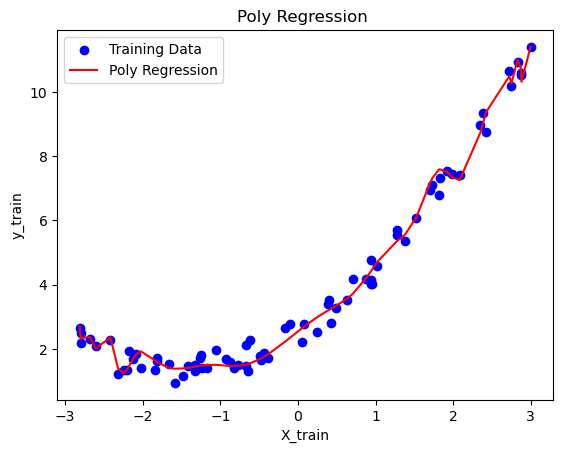

In [47]:
poly_regression(30)

As we increase our degree its trying to overfit, rather recognizing the pattern, it tries to be the best fit for the points in the trained dataset.